In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

/Users/abrobrown/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


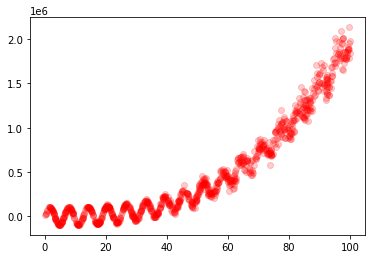

In [30]:
# data preperation
TRUE_W = 2.0
TRUE_B = 10.0
LENGTH = 1000
# data generate
X = np.random.uniform(low = 0.0,high = 100.0,size = LENGTH)
#linear model
# y = TRUE_W * X + TRUE_B + np.random.randn(LENGTH) * 10

# non-linear model
#y = TRUE_W * (X + np.random.randn(LENGTH) * 2) **2 + TRUE_B

# very very non-linear
y = TRUE_W * (X + np.random.randn(LENGTH) * 2) ** 3 + TRUE_W * \
    (X + np.random.randn(LENGTH) * 2) ** 2 + np.sin(X) * 100000  + TRUE_B

plt.plot(X,y,'ro',alpha = 0.2)


In [ ]:
# to recap, we use statsmodels
X = sm.add_constant(X)
model_sm = sm.OLS(y,X).fit()
print(model_sm.summary())


Epoch 1/30
4/4 [==============================] - 0s 2ms/step - loss: 6076.6934
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 5999.0986
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 5910.3052
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 5826.1089
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 5745.1987
Epoch 6/30
4/4 [==============================] - 0s 2ms/step - loss: 5655.5552
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 5573.0005
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 5476.2627
Epoch 9/30
4/4 [==============================] - 0s 2ms/step - loss: 5392.3545
Epoch 10/30
4/4 [==============================] - 0s 2ms/step - loss: 5297.3462
Epoch 11/30
4/4 [==============================] - 0s 5ms/step - loss: 5207.3804
Epoch 12/30
4/4 [==============================] - 0s 3ms/step - loss: 5117.3862
Epoch 13/30
4/4 [====================

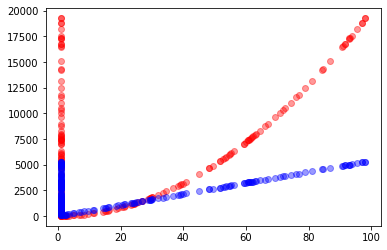

In [52]:
# use tf.keras
X = tf.constant(X)
y = tf.constant(y)
model_keras = keras.Sequential()
model_keras.add(keras.layers.Dense(1))
model_keras.compile(optimizer=keras.optimizers.SGD(),
                    loss=keras.losses.mae)
model_keras.fit(X,y,epochs = 30)
pred_y = model_keras.predict(X.numpy())
plt.figure()
plt.plot(X,y,'ro',alpha = 0.4)
plt.plot(X,pred_y,'bo',alpha = 0.4)
plt.show()


Epoch 1/200
32/32 [==============================] - 2s 2ms/step - loss: 0.1094
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 11/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 12/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/200
32/32 [=================

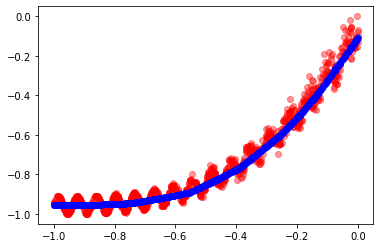

In [41]:
# use the tf.keras update model
X = tf.constant((X - np.max(X))/(np.max(X) - np.min(X)) )
y = tf.constant((y - np.max(y))/(np.max(y) - np.min(y)))

model_keras_2 = keras.Sequential()
model_keras_2.add(keras.layers.Dense(60, activation="tanh"))
model_keras_2.add(keras.layers.Dense(60, activation="tanh"))
model_keras_2.add(keras.layers.Dense(60, activation="relu"))
model_keras_2.add(keras.layers.Dense(1))

model_keras_2.compile(loss='mse',
                      optimizer=keras.optimizers.Adam(learning_rate=0.001))

model_keras_2.fit(X,y,epochs = 200)
pred_y = model_keras_2.predict(X.numpy())
plt.figure()
plt.plot(X, y, 'ro', alpha=0.4)
plt.plot(X, pred_y, 'bo', alpha=0.4)
plt.show()
